In [50]:
# EDA

# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
# load data set
df = pd.read_csv('Cardiotocographic.csv')

Data Cleaning and Preparation

In [52]:
# Check for missing values
df.isnull().sum()

,0
LB,21
AC,20
FM,0
UC,0
DL,0
DS,21
DP,21
ASTV,0
MSTV,0
ALTV,0


In [53]:
# Handle missing value
df.fillna(df.mean(), inplace=True)

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [54]:
# indentify and correct inconsistancies in data types
df['LB'] = pd.to_numeric(df['LB'], errors='coerce')
df

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [55]:
# Detect and treat outliers if necessary
Q1 = df['LB'].quantile(0.25)
Q3 = df['LB'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['LB'] < (Q1 - 1.5 * IQR)) | (df['LB'] > (Q3 + 1.5 * IQR)))]

In [56]:
# statistical summary
df.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2116.000000,2116.000000,2116.000000,2116.000000,2116.000000,2116.000000,2116.000000,2116.000000,2116.000000,2116.000000,2116.000000,2116.000000,2116.000000,2116.000000
mean,133.268648,0.003216,0.009927,0.004385,0.001899,0.000003,0.000176,47.049159,1.364731,10.322760,8.275317,70.399908,0.315504,1.305478
std,9.766438,0.004375,0.067697,0.003299,0.003347,0.000141,0.000837,18.680790,1.175361,21.245105,7.742562,42.748306,0.642898,0.642453
min,106.000000,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001858,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001668,0.000000,0.004496,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.500000,68.000000,0.000000,1.000000
75%,140.000000,0.005598,0.002568,0.006540,0.003304,0.000000,0.000000,61.000000,1.700000,11.000000,10.800000,100.000000,1.000000,1.000067
max,160.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


Data Visualization

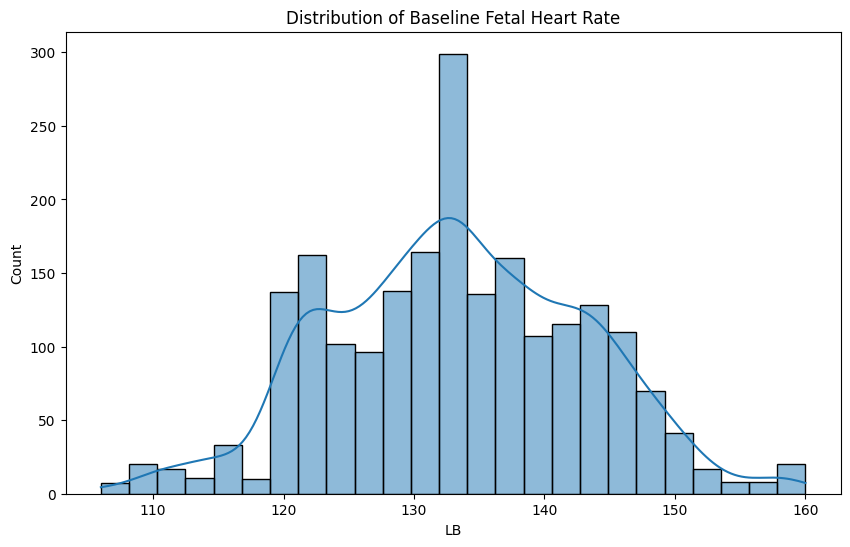

In [57]:
# Histograms
plt.figure(figsize=(10, 6))
sns.histplot(df['LB'], kde=True)
plt.title('Distribution of Baseline Fetal Heart Rate')
plt.show()

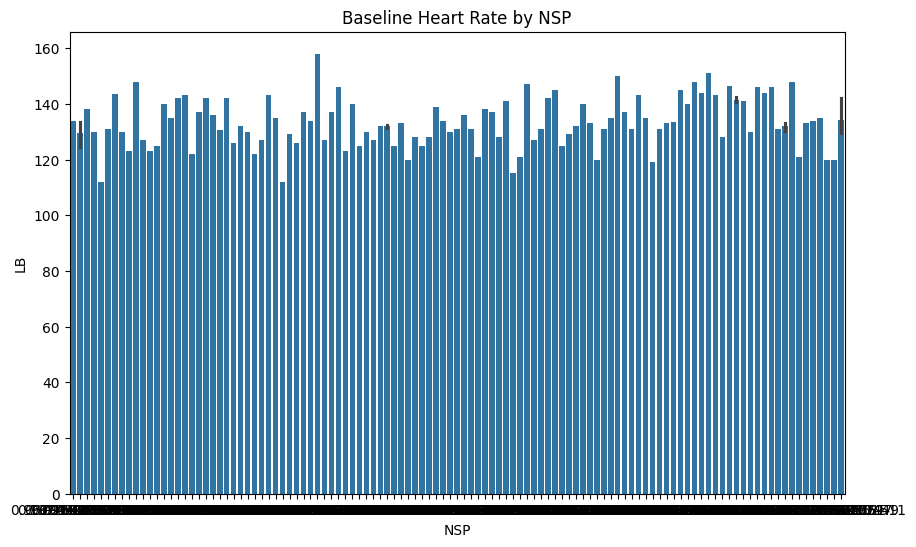

In [58]:
# bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='NSP', y='LB', data=df)
plt.title('Baseline Heart Rate by NSP')
plt.show()

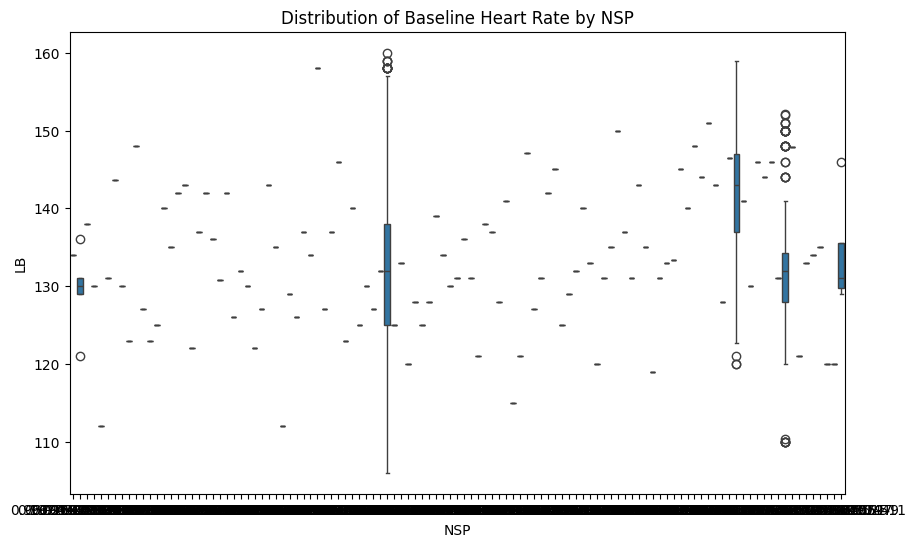

In [59]:
# box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='NSP', y='LB', data=df)
plt.title('Distribution of Baseline Heart Rate by NSP')
plt.show()

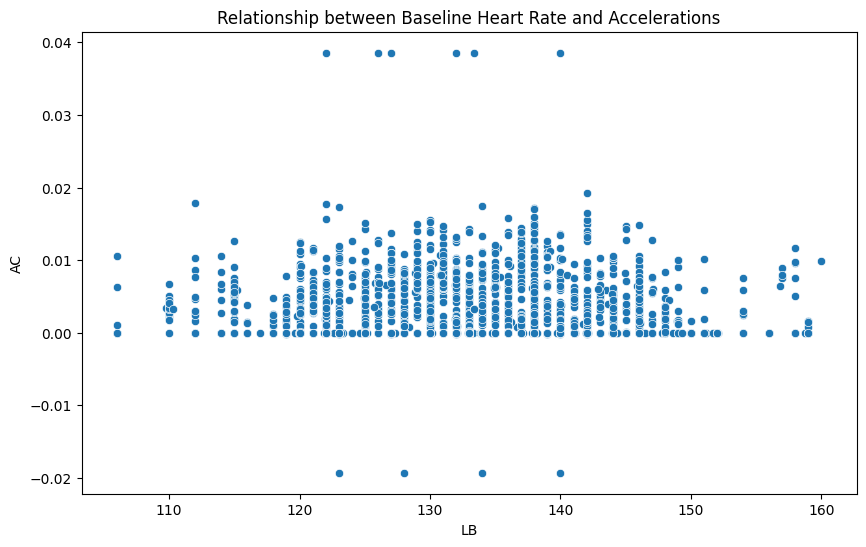

In [60]:
# scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LB', y='AC', data=df)
plt.title('Relationship between Baseline Heart Rate and Accelerations')
plt.show()

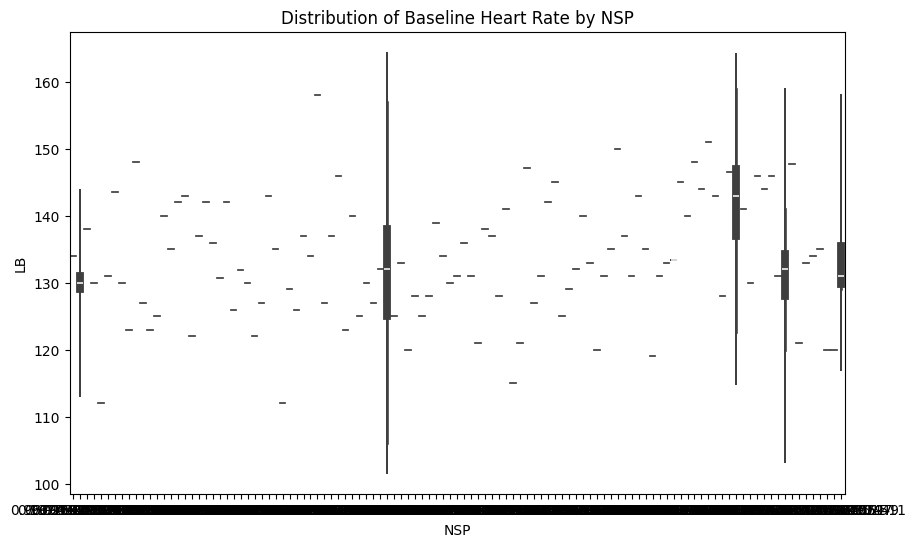

In [61]:
# violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='NSP', y='LB', data=df)
plt.title('Distribution of Baseline Heart Rate by NSP')
plt.show()

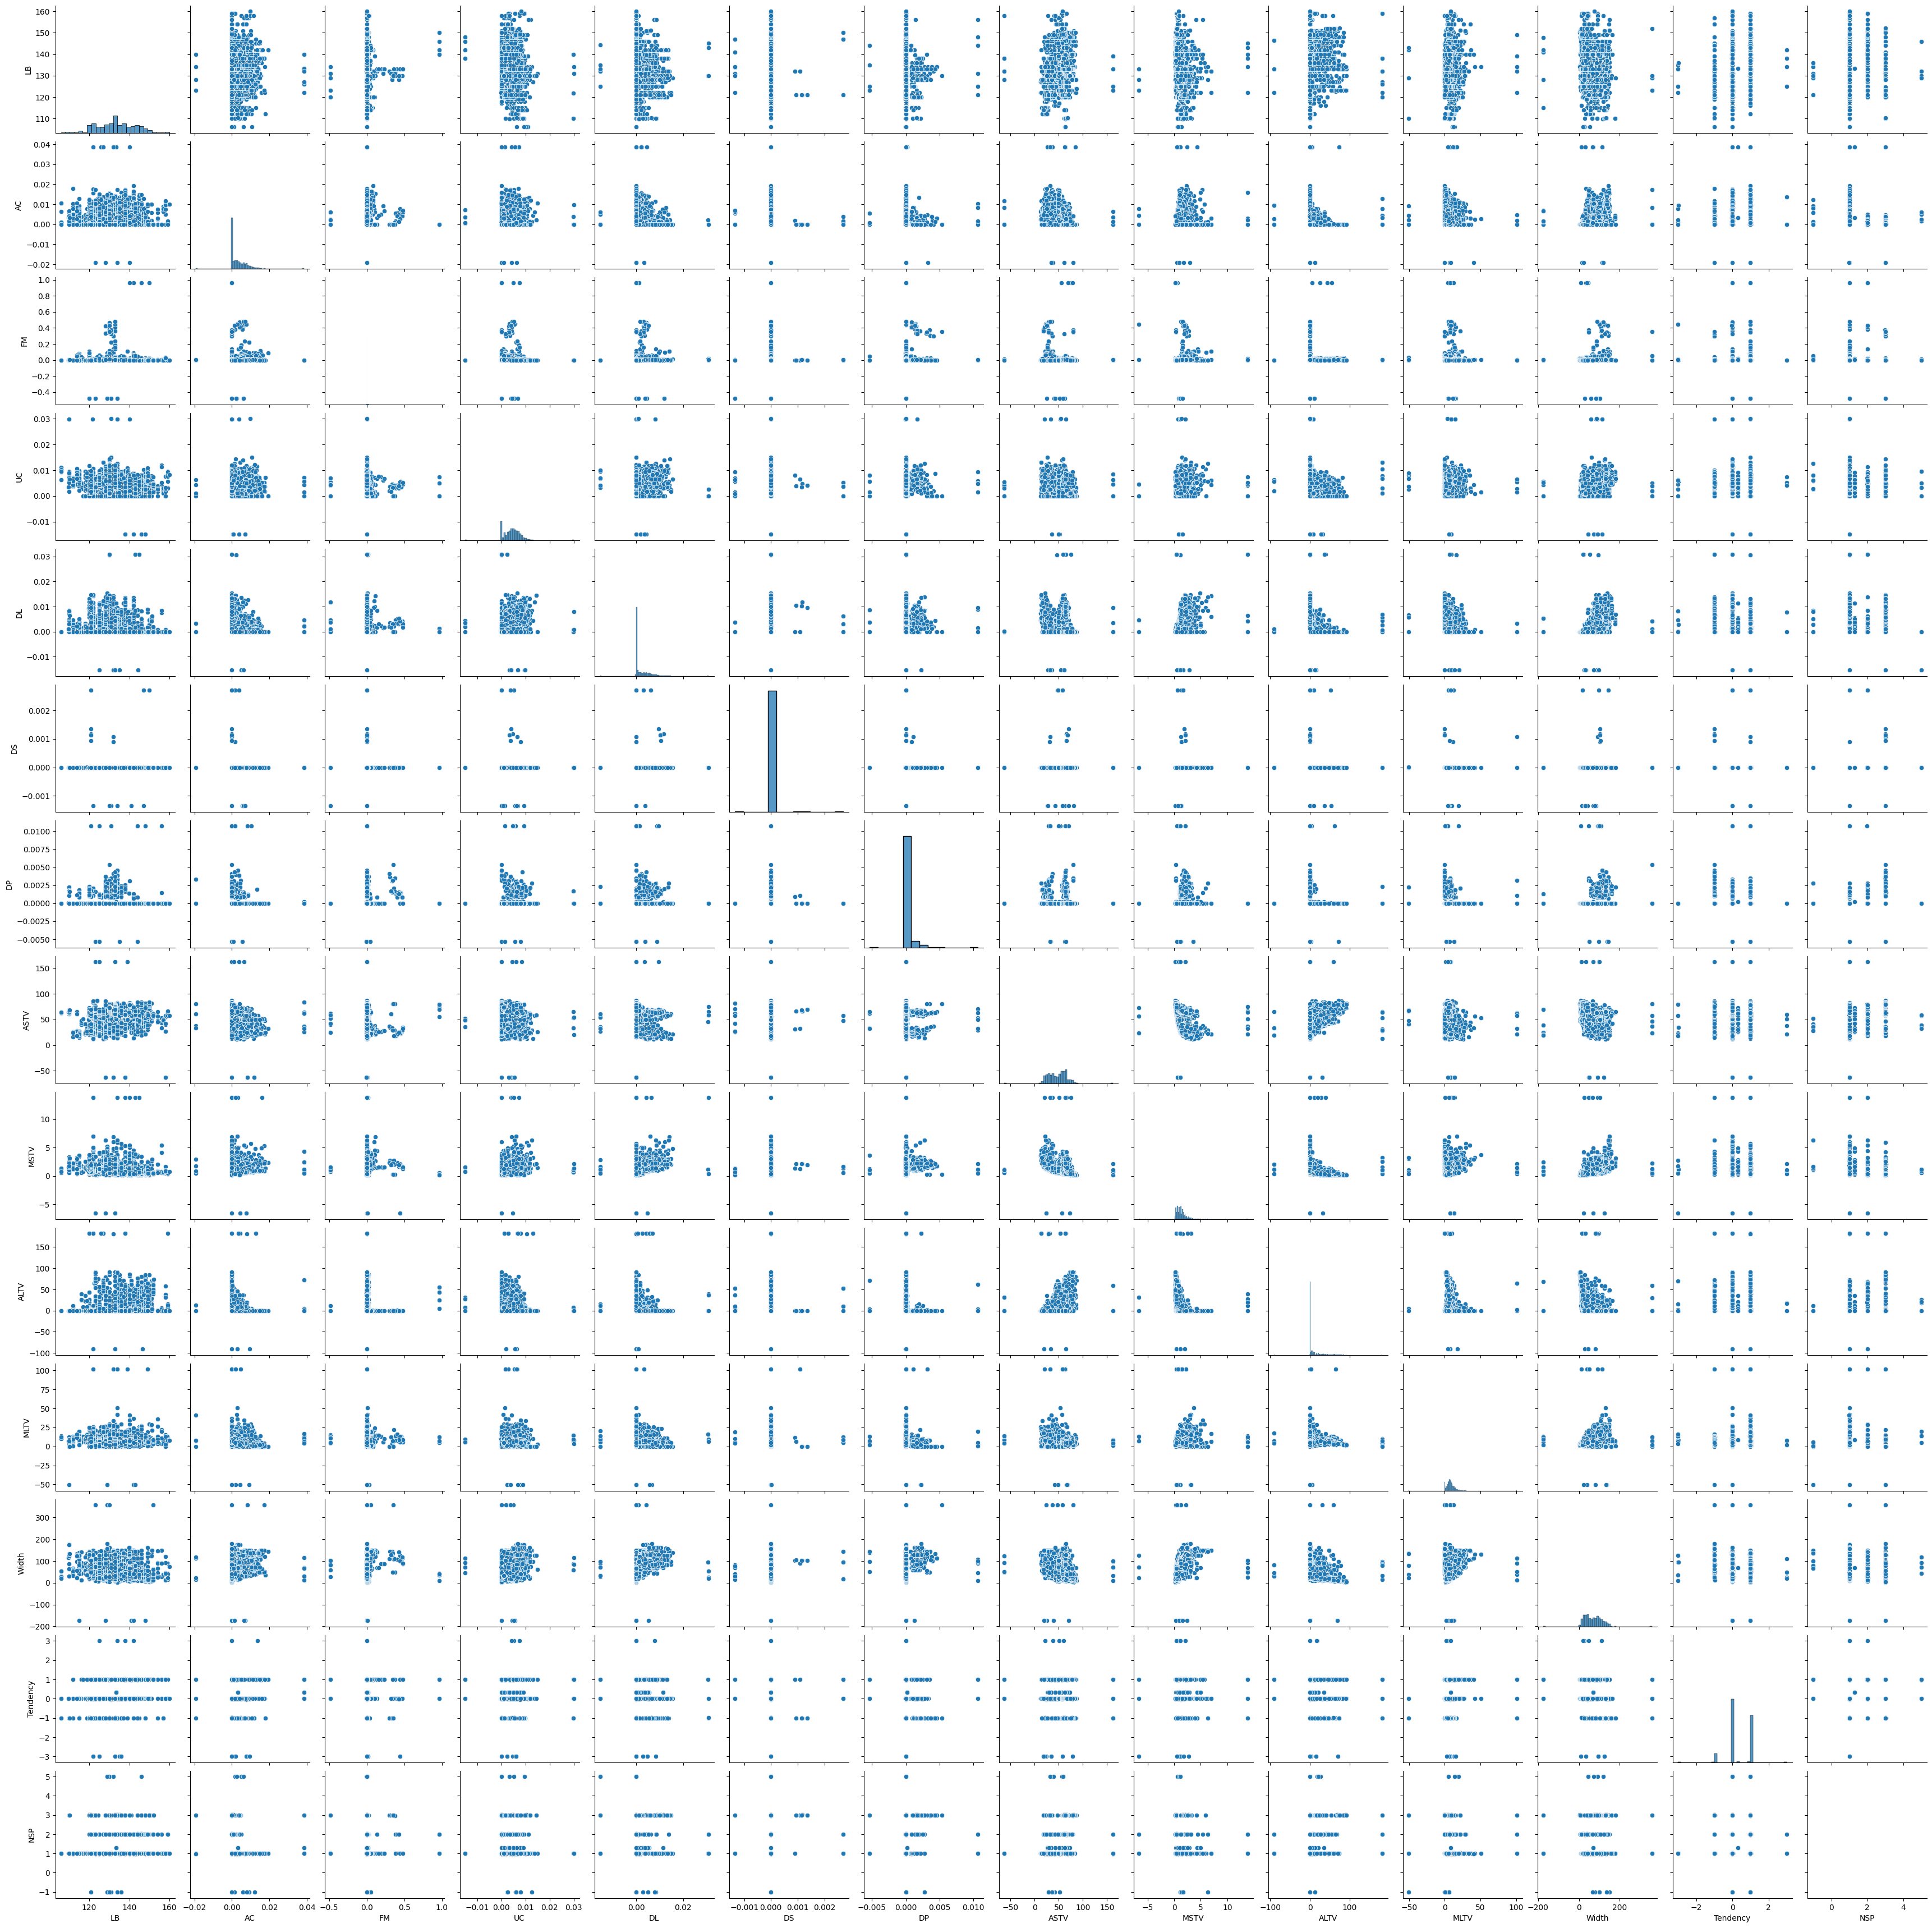

In [63]:
# Pair plot
sns.pairplot(df)
plt.show()

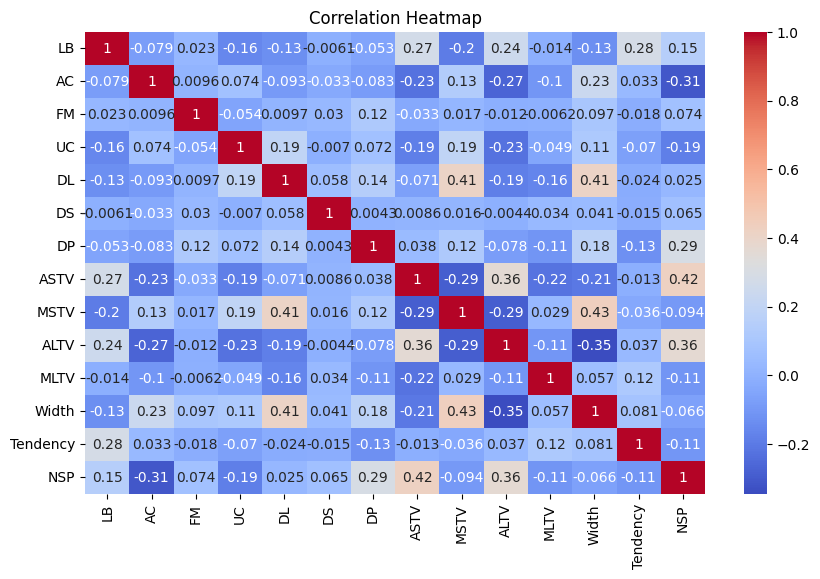

In [64]:
# correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [66]:
# identify correlation between variables
df.corr()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
LB,1.000000,-0.079131,0.022684,-0.158825,-0.131548,-0.006097,-0.053308,0.271344,-0.195230,0.244419,-0.013544,-0.134381,0.283046,0.149488
AC,-0.079131,1.000000,0.009551,0.073641,-0.092699,-0.033150,-0.083260,-0.227224,0.132557,-0.270831,-0.104752,0.234820,0.033396,-0.311808
FM,0.022684,0.009551,1.000000,-0.053590,0.009679,0.029895,0.121190,-0.033409,0.017055,-0.012131,-0.006167,0.097294,-0.018251,0.073985
UC,-0.158825,0.073641,-0.053590,1.000000,0.194653,-0.006993,0.071919,-0.186542,0.194464,-0.229439,-0.048918,0.111531,-0.070114,-0.186489
DL,-0.131548,-0.092699,0.009679,0.194653,1.000000,0.058483,0.144907,-0.070526,0.410576,-0.187642,-0.164843,0.409417,-0.023587,0.024959
DS,-0.006097,-0.033150,0.029895,-0.006993,0.058483,1.000000,0.004274,0.008552,0.016066,-0.004411,0.034398,0.040889,-0.015404,0.065436
DP,-0.053308,-0.083260,0.121190,0.071919,0.144907,0.004274,1.000000,0.037884,0.119306,-0.078062,-0.113984,0.175798,-0.130338,0.294409
ASTV,0.271344,-0.227224,-0.033409,-0.186542,-0.070526,0.008552,0.037884,1.000000,-0.292789,0.359139,-0.222591,-0.206568,-0.013120,0.423339
MSTV,-0.195230,0.132557,0.017055,0.194464,0.410576,0.016066,0.119306,-0.292789,1.000000,-0.292034,0.028501,0.432876,-0.035883,-0.094261
ALTV,0.244419,-0.270831,-0.012131,-0.229439,-0.187642,-0.004411,-0.078062,0.359139,-0.292034,1.000000,-0.107122,-0.345944,0.037452,0.364747
